In [41]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [44]:
data = pd.read_csv('WikiArtClean.csv')

In [43]:
#data

[]

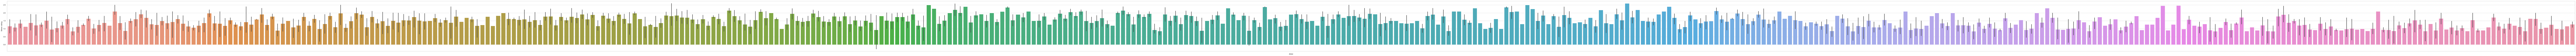

In [35]:
# average rating by artist
data2 = data
for artist in data['Artist'].unique():
    if data[data['Artist']==artist]['Mean rating'].mean() <= data['Mean rating'].mean():
        data2 = data2[data2['Artist']!=artist]

f, ax = plt.subplots(figsize=(300, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Artist", y="Mean rating", data=data2, ax=ax)
ax.set_xticklabels([])

,Style,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL,Is painting,Face or body,...,Love,Optimism,Pessimism,Regret,Sadness,Shame,Shyness,Surprise,Trust,Neutral
1110,Post Renaissance Art,Realism,Albert Anker,Young mother contemplating her sleeping child ...,1875,https://use2-uploads3.wikiart.org/images/alber...,https://www.wikiart.org/en/albert-anker/young-...,https://www.wikiart.org/en/albert-anker,yes,face,...,0.900,0.100,0.000,0.000,0.000,0.0,0.0,0.1,0.500,0.0
1352,Post Renaissance Art,Neoclassicism,John William Godward,Contemplation,1903,https://use2-uploads0.wikiart.org/images/john-...,https://www.wikiart.org/en/john-william-godwar...,https://www.wikiart.org/en/john-william-godward,yes,face,...,0.455,0.182,0.091,0.091,0.182,0.0,0.0,0.0,0.455,0.0
183,Renaissance Art,High Renaissance,Leonardo da Vinci,Leda,1510,https://use2-uploads3.wikiart.org/images/leona...,https://www.wikiart.org/en/leonardo-da-vinci/l...,https://www.wikiart.org/en/leonardo-da-vinci,yes,face,...,0.600,0.400,0.000,0.000,0.000,0.2,0.0,0.1,0.300,0.0
3594,Modern Art,Magic Realism,Eyvind Earle,Black Silken Hair,1995,https://use2-uploads5.wikiart.org/images/eyvin...,https://www.wikiart.org/en/eyvind-earle/black-...,https://www.wikiart.org/en/eyvind-earle,yes,face,...,0.500,0.083,0.000,0.000,0.083,0.0,0.0,0.0,0.250,0.0
1213,Modern Art,Impressionism,George Henry,River Landscape by Moonlight,1887,https://use2-uploads7.wikiart.org/images/georg...,https://www.wikiart.org/en/george-henry/river-...,https://www.wikiart.org/en/george-henry,yes,none,...,0.091,0.273,0.000,0.000,0.091,0.0,0.0,0.0,0.182,0.0


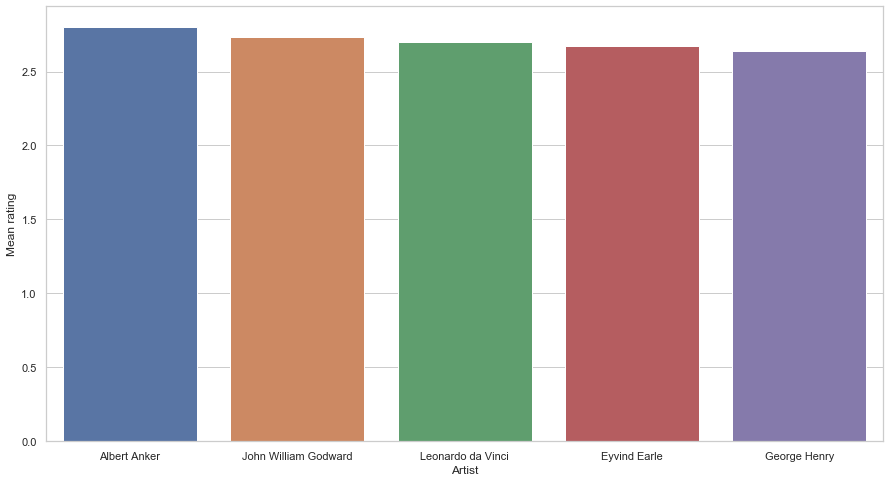

In [37]:
# average rating by artist (top 5)
f, ax = plt.subplots(figsize=(15, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x="Artist", y="Mean rating", data=data2.nlargest(5, 'Mean rating'), ax=ax)

data2.nlargest(5, 'Mean rating')

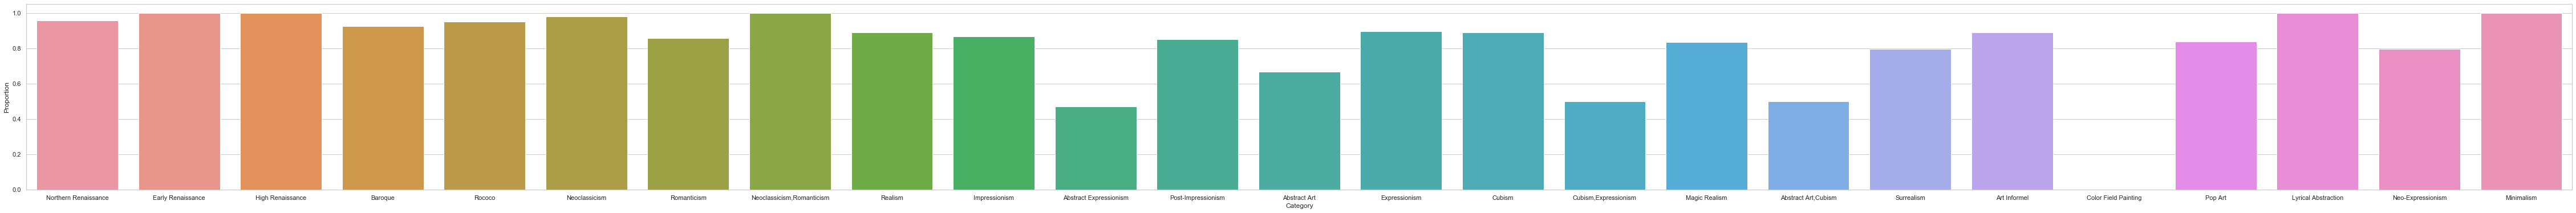

In [103]:
# face proportion by category
data3 = data
data3['Proportion'] = 0.01
for category in data['Category'].unique():
    if data[data['Category']==category].shape[0] <= 5:
        data3 = data3[data3['Category']!=category]
        
for index, row in data3.iterrows():
    category = row['Category']
    face = len(data3[(data3['Category']==category) & (data3['Face or body']=='face')])
    body = len(data3[(data3['Category']==category) & (data3['Face or body']=='body')])
    total = face + body
    ratio = round(face / total, 3)
    data3.at[index, 'Proportion'] = float(ratio)
    
f, ax = plt.subplots(figsize=(80, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Category", y="Proportion", data=data3, ax=ax)

In [108]:
# face proportion by category (top 10)
data3.nlargest(10, 'Proportion')

,Style,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL,Is painting,Face or body,...,Optimism,Pessimism,Regret,Sadness,Shame,Shyness,Surprise,Trust,Neutral,Proportion
1,Renaissance Art,Early Renaissance,Masaccio,St. Juvenal Triptych,1422,https://use2-uploads3.wikiart.org/images/masac...,https://www.wikiart.org/en/masaccio/st-juvenal...,https://www.wikiart.org/en/masaccio,yes,face,...,0.188,0.000,0.000,0.063,0.000,0.000,0.000,0.688,0.0,1.0
3,Renaissance Art,Early Renaissance,Masaccio,The Tribute Money,1425,https://use2-uploads1.wikiart.org/images/masac...,https://www.wikiart.org/en/masaccio/the-tribut...,https://www.wikiart.org/en/masaccio,yes,face,...,0.083,0.083,0.000,0.000,0.083,0.000,0.167,0.500,0.0,1.0
4,Renaissance Art,Early Renaissance,Masaccio,St. Paul,1426,https://use2-uploads0.wikiart.org/images/masac...,https://www.wikiart.org/en/masaccio/st-paul-1426,https://www.wikiart.org/en/masaccio,yes,face,...,0.273,0.000,0.000,0.364,0.000,0.000,0.091,0.364,0.0,1.0
5,Renaissance Art,Early Renaissance,Masaccio,St. Andrew,1426,https://use2-uploads2.wikiart.org/images/masac...,https://www.wikiart.org/en/masaccio/st-andrew-...,https://www.wikiart.org/en/masaccio,yes,face,...,0.109,0.016,0.016,0.234,0.000,0.000,0.047,0.516,0.0,1.0
6,Renaissance Art,Early Renaissance,Masaccio,Adam and Eve banished from Paradise,1427,https://use2-uploads5.wikiart.org/images/masac...,https://www.wikiart.org/en/masaccio/adam-and-e...,https://www.wikiart.org/en/masaccio,yes,face,...,0.014,0.197,0.465,0.662,0.676,0.028,0.014,0.085,0.0,1.0
8,Renaissance Art,Early Renaissance,Filippo Lippi,Madonna and Child,1430,https://use2-uploads6.wikiart.org/images/filip...,https://www.wikiart.org/en/filippo-lippi/madon...,https://www.wikiart.org/en/filippo-lippi,yes,face,...,0.100,0.000,0.000,0.000,0.000,0.000,0.100,0.400,0.0,1.0
9,Renaissance Art,Early Renaissance,Fra Angelico,Last Judgment,1431,https://use2-uploads5.wikiart.org/images/fra-a...,https://www.wikiart.org/en/fra-angelico/last-j...,https://www.wikiart.org/en/fra-angelico,yes,face,...,0.143,0.143,0.071,0.000,0.071,0.071,0.143,0.429,0.0,1.0
11,Renaissance Art,Early Renaissance,Donatello,David,1432,https://use2-uploads2.wikiart.org/images/donat...,https://www.wikiart.org/en/donatello/david-1432,https://www.wikiart.org/en/donatello,no,face,...,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.0,1.0
13,Renaissance Art,Early Renaissance,Domenico Veneziano,Madonna and Child,1435,https://use2-uploads6.wikiart.org/images/domen...,https://www.wikiart.org/en/domenico-veneziano/...,https://www.wikiart.org/en/domenico-veneziano,yes,face,...,0.000,0.000,0.000,0.083,0.000,0.000,0.083,0.500,0.0,1.0
20,Renaissance Art,Early Renaissance,Paolo Uccello,Equestrian Monument of Sir John Hawkwood,1436,https://use2-uploads2.wikiart.org/images/paolo...,https://www.wikiart.org/en/paolo-uccello/eques...,https://www.wikiart.org/en/paolo-uccello,yes,face,...,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.600,0.0,1.0


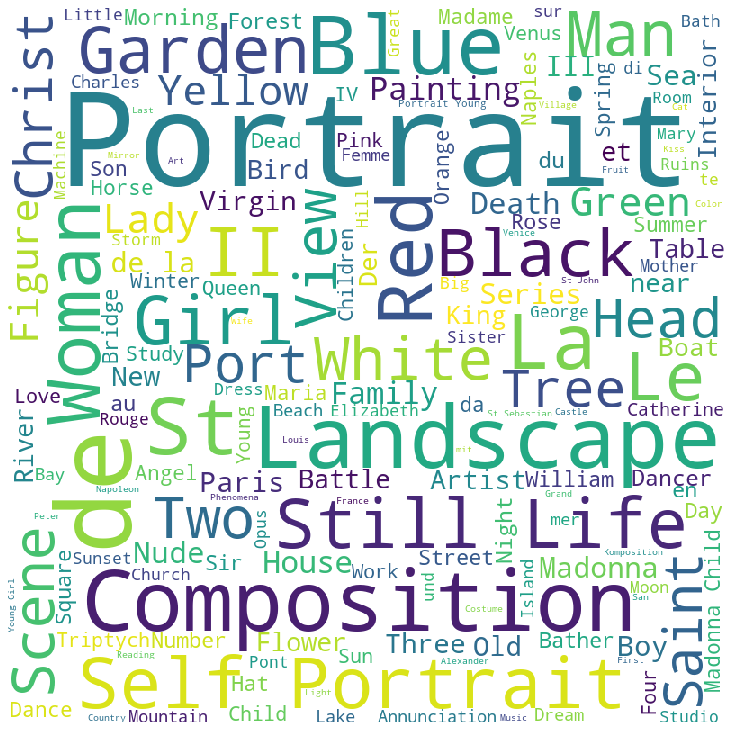

In [24]:
# wordcloud
titles = ''
for title in data['Title']:
    if 'Untitled' not in title:
        tmp = title + ' '
        titles += tmp
        
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width=800, 
                      height=800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(titles) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 